In [1]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Black Scholes Option Pricing

In [2]:
#define variables
r = 0.01                      #risk-free rate
S = 10                        #stock price
K = 40                        #strike price
T = 240/365                   #maturity
sigma = 0.30                  #implied volatility

In [3]:
def blackScholes(r, S, K, T, sigma, type="C"):
    "calculate BS option price for a call/put"
    global d1
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type =="C":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "P":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1 , 0, 1)
        return price
    except:
        print("please confirm all paramaters above")

In [4]:
blackScholes(r, S, K, T, sigma, type="C")

5.6778921871964104e-09

In [5]:
#import libraries that allow us to check whether or not our manual greek calculation is correct
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
bs('c', S, K, T, r, sigma)

5.677892187196249e-09

In [6]:
def delta_calc(r, S, K, T, sigma, type="C"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "C":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "P":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'C' for Call or 'P' for Put")

In [7]:
def gamma_calc(r, S, K, T, sigma, type="C"):
    "calculate gamma of an option for a call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("Please confirm all option parameters above")

In [8]:
def vega_calc(r, S, K, T, sigma, type="C"):
    "calculate vega of an option for a call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = norm.pdf(d1, 0, 1)*(np.sqrt(T))
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("Please confirm all option parameters above")

In [9]:
def theta_calc(r, S, K, T, sigma, type="C"):
    "calculate BS option price for a call/put"
    global d1
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type =="C":
            theta_calc = -S*norm.cdf(d1, 0, 1) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "P":
            theta_calc = -S*norm.cdf(d1, 0, 1) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("Please confirm all option parameters above")

In [10]:
d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))

def rho_calc(r, S, K, T, sigma, type="C"):
    "calculate BS option price for a call/put"
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type =="C":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "P":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("Please confirm all option parameters above")
rho_calc(r, S, K, T, sigma, type="C")

(9.017057835509008e-10, -0.26128996586090386)

In [11]:
option_type = 'C'

print("Option Price: ", [blackScholes(r, S, K, T, sigma, option_type)]) 
print("       Delta: ", [delta_calc(r, S, K, T, sigma, option_type)]) 
print("       Gamma: ", [gamma_calc(r, S, K, T, sigma, option_type)]) 
print("       Vega : ", [vega_calc(r, S, K, T, sigma, option_type)]) 
print("       Theta: ", [delta_calc(r, S, K, T, sigma, option_type)]) 
print("       Rho  : ", [rho_calc(r, S, K, T, sigma, option_type)]) 

Option Price:  [5.6778921871964104e-09]
       Delta:  [(1.428123134355626e-08, 1.428123134355627e-08)]
       Gamma:  [(3.3580363430144057e-08, 3.3580363430144057e-08)]
       Vega :  [(6.624071690329788e-10, 6.624071690329788e-09)]
       Theta:  [(1.428123134355626e-08, 1.428123134355627e-08)]
       Rho  :  [(9.017057835509008e-10, -0.26128996586090386)]


### Implied Volatility Calculation

In [12]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from IPython.display import HTML, Image # For GIF
from matplotlib import rc
rc('animation', html='jshtml')

In [13]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Compute the implied volatility of a European Option
        S0: initial stock price
        K:  strike price
        T:  maturity
        r:  risk-free rate
        market_price: market observed price
        tol: user choosen tolerance
    """
    max_iter = 200 #max number of iterations
    vol_old = 0.30 #initial guess

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime =  vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price
        vol_new = vol_old - C/Cprime
        bs_new = bs(flag, S0, K, T, r, vol_new)

        if (abs(vol_old - vol_new) < tol or abs(bs_new - market_price) < tol):
            break
        vol_old = vol_new

    implied_vol = vol_old
    return implied_vol

In [14]:
S0, K, T, r = 30, 28, 0.2, 0.025
market_price = 3.97
implied_vol_est = implied_vol(S0, K, T, r, market_price, flag='c')
print("Implied Volatility is : ", round(implied_vol_est,2)*100, "%")

Implied Volatility is :  54.0 %


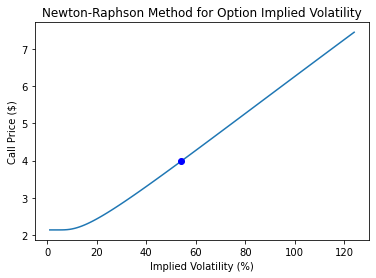

In [15]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.000001):
    """Compute the implied volatility of a European Option
        S0: initial stock price
        K:  strike price
        T:  maturity
        r:  risk-free rate
        market_price: market observed price
        tol: user choosen tolerance
    """
    max_iter = 200 #max number of iterations
    vol_old = 0.11 #initial guess

    x_vals = []
    y_vals = []

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime =  vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price
        vol_new = vol_old - C/Cprime

        #append 1 - move up
        x_vals.append([vol_old*100,vol_old*100])
        y_vals.append([0,bs_price])

        bs_new = bs(flag, S0, K, T, r, vol_new)

        #append 2 - take step
        x_vals.append([vol_old*100,vol_new*100])
        y_vals.append([bs_price,0])

        if (abs(vol_old - vol_new) < tol):
            break

        vol_old = vol_new

        

    implied_vol = vol_old
    return implied_vol, x_vals, y_vals

S0, K, T, r, sigma = 30, 28, 0.2, 0.025, 0.3
prices, vols = [], []
for sigma in range(1,125):
    # print(bs('c', S0, K, T, r, sigma/100))
    # print(sigma)
    prices.append( bs('c', S0, K, T, r, sigma/100) )
    vols.append( sigma )

# print(prices)

market_price = 3.9790765403377035
implied_vol, x_vals, y_vals = implied_vol(S0, K, T, r, market_price, flag='c')

fig, ax = plt.subplots()
plt.title('Newton-Raphson Method for Option Implied Volatility')
plt.ylabel('Call Price ($)')
plt.xlabel('Implied Volatility (%)')
xdata, ydata = [], []
y1, = ax.plot(vols, prices, label = 'Black Scholes Price')
y3, = ax.plot([54], [market_price], 'bo', label = 'Market Price')
y2, = ax.plot([], [], 'r--')
y4, = ax.plot([], [], 'ro', label = 'Calc. Price')

y5, = ax.plot([], [], 'go', label = 'Calc. Implied Vol')
y6, = ax.plot([], [], 'g--')


### Bachelier Option Pricing

In [16]:
def bachelier_sim(F_0, sigma, T, steps, n):
    
    paths = []
    
    for i in range(n):
        prices = [F_0]
        
        dt = T/steps
        t_index = 0
        
        while(t_index + dt < T):
            prices.append(prices[-1] + sigma*np.random.normal(0,1)*(dt**(.5)))
            t_index += dt
        paths.append(prices)
    return paths

In [18]:
paths = bachelier_sim(0, .3, 1, 252, 100)

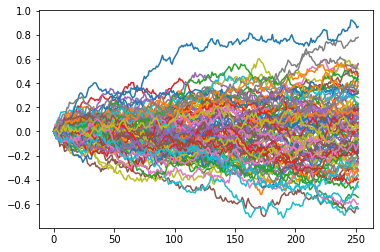

In [19]:
for path in paths:
    plt.plot(path)

### Monte Carlo Option Pricing

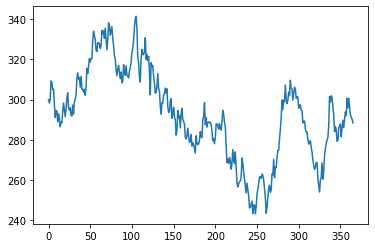

In [19]:
class StochasticProcess:
    def time_step(self):
        dW = np.random.normal(0, math.sqrt(self.delta_t))
        dS = self.drift*self.delta_t*self.current_asset_price + self.volatility*self.current_asset_price*dW
        self.asset_prices.append(self.current_asset_price + dS)
        self.current_asset_price = self.current_asset_price + dS
        
    def __init__(self, drift, volatility, delta_t, initial_asset_price):
        self.drift = drift
        self.volatility = volatility
        self.delta_t = delta_t
        self.current_asset_price = initial_asset_price
        self.asset_prices = [initial_asset_price]

processes = []
for i in range(0, 100):
    processes.append(StochasticProcess(.2, .3, 1/365, 300))

for process in processes:
    tte = 1
    while((tte - process.delta_t) > 0):
        process.time_step()
        tte = tte - process.delta_t

x = plt.plot(np.arange(0, len(processes[0].asset_prices)), processes[0].asset_prices)

In [20]:
class Call:
    def __init__(self, strike):
        self.strike = strike

class EuroCallSim:
    def __init__(self, Call, n_options, initial_asset_price, drift, delta_t, volatility, tte, rfr):
        stochastic_processes = []
        for i in range(0, n_options):
            stochastic_processes.append(StochasticProcess(initial_asset_price, drift, delta_t, volatility))
        
        for stochastic_process in stochastic_processes:
            ttei = tte
            while((ttei-stochastic_process.delta_t) > 0):
                ttei = ttei - stochastic_process.delta_t
                stochastic_process.time_step()
        
        payoffs = []
        for stochastic_process in stochastic_processes:
            payoff = stochastic_process.asset_prices[len(stochastic_process.asset_prices)-1] - Call.strike
            z = payoff if payoff > 0 else 0
            payoff.append(z)
        
        self.price = np.average(payoffs)*math.exp(-tte*rfr)

print(EuroCallSim(Call(130), 1000, 295.48, 0, 1/365, 1.0625, 36/365, 0.08).price)

AttributeError: 'float' object has no attribute 'append'

In [66]:
aggregate_shots_made = []
for i in range(0, 10000):
    shots_made = []
    for k in range(0, 100):
        r = np.random.random()
        if(r <= .7):
            shots_made.append(1)
        else:
            shots_made.append(0)
    if(sum(shots_made) >= 70):
        aggregate_shots_made.append(1)
    else:
        aggregate_shots_made.append(0)

print(np.average(aggregate_shots_made))

0.541


In [79]:
def geometric_brownian_motion(S_0, mu, sigma, T, dt, n):
    paths = []
    for i in range(n):
        prices = [S_0]
        time = 0
    
        while(time+dt<=T):
            prices.append(prices[-1]*np.exp((mu - .5*(sigma))*dt + sigma*np.random.normal(0, np.sqrt(dt))))
            time += dt
        if T - (time) > 0:
            prices.append(prices[-1]*np.exp((mu - 0.5*(sigma**2))*(T-time) + sigma*np.random.normal(0, np.sqrt(T-time))))
        paths.append(prices)
    return paths    

In [80]:
S_0 = 100
mu = .08
sigma = .03
T = 1
dt = 1/252
n = 100
sample_paths = geometric_brownian_motion(S_0, mu, sigma, T, dt, n)

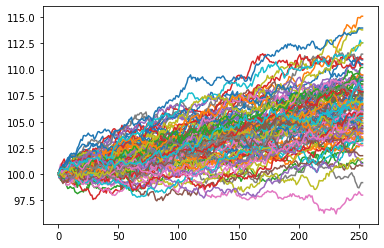

In [82]:
for path in sample_paths:
    plt.plot(path)

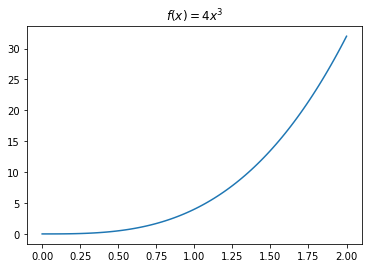

In [84]:
x = np.linspace(0, 2, 100)
y = 4*(x**3)
plt.title('$f(x) = 4x^3$')
plt.plot(x, y)

In [85]:
def f(x):
    return 4*(x**3)

In [86]:
x = np.random.uniform(0, 2, 10000)
Y= f(x)*2
MC = np.sum(Y)/10000
MC

15.92196643593041

In [87]:
#correlated brownian motion with Hermitian positive-definite matrix
rho = -.9
C = np.array([[1, rho], [rho, 1]])
L = np.linalg.cholesky(C)
dt = 1/252
X = np.random.normal(0, (dt**(1/2)), (2, 1000))
CX = np.dot(L, X)

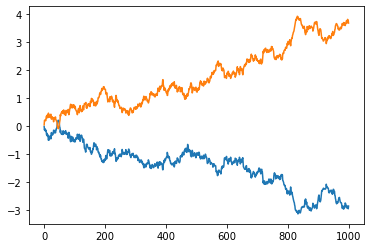

In [88]:
for path in CX:
    plt.plot(path.cumsum())

In [89]:
np.corrcoef(CX)

array([[ 1.        , -0.89604925],
       [-0.89604925,  1.        ]])

In [90]:
Zt = X[1]
Wt1 = X[0]
Wt2 = rho*Wt1 + np.sqrt(1-(rho**2))*Zt

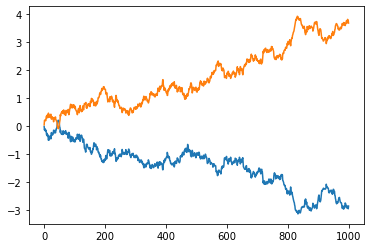

In [92]:
plt.plot(Wt1.cumsum())
plt.plot(Wt2.cumsum())

In [94]:
np.corrcoef(np.array([Wt1, Wt2]))

array([[ 1.        , -0.89604925],
       [-0.89604925,  1.        ]])